In [1]:
import pandas as pd 
import numpy as np

## Time Series Analysis

In [ ]:
# turn off warning
pd.options.mode.chained_assignment = None

### General analysis

In [2]:
ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')

In [3]:
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

In [4]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.715712e+06
mean,3.886281e+00,3.796439e+00,3.800010e+00,3.837103e+00,3.846609e+00,3.830343e+00
std,5.956038e-01,6.705662e-01,6.603258e-01,7.044489e-01,6.806139e-01,6.142972e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.530000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.930000e+00
75%,4.250000e+00,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.230000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [5]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


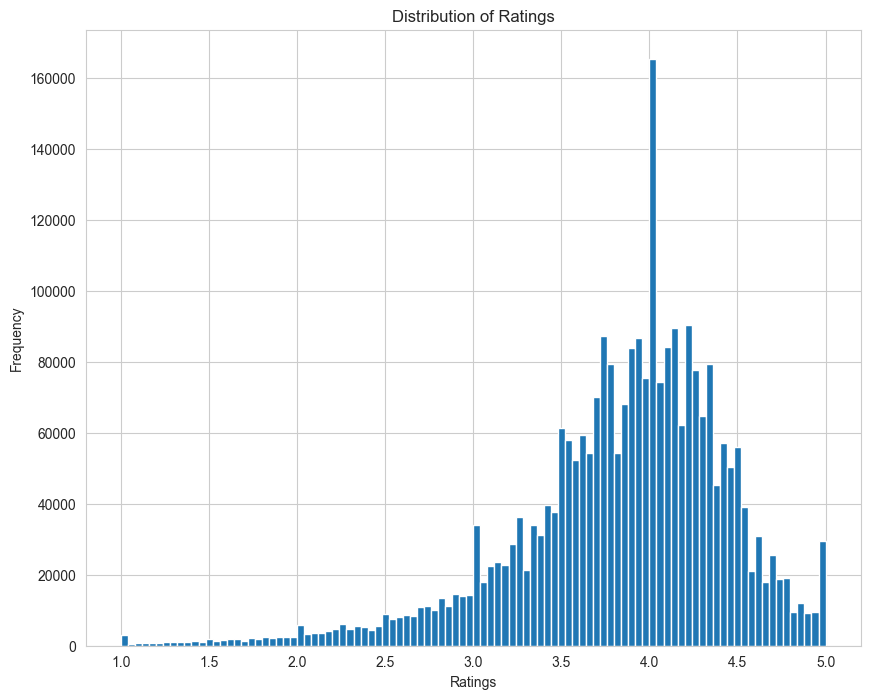

In [6]:
# plot distribution of ratings 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.hist(ratings_ba_df.rating, bins=100)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



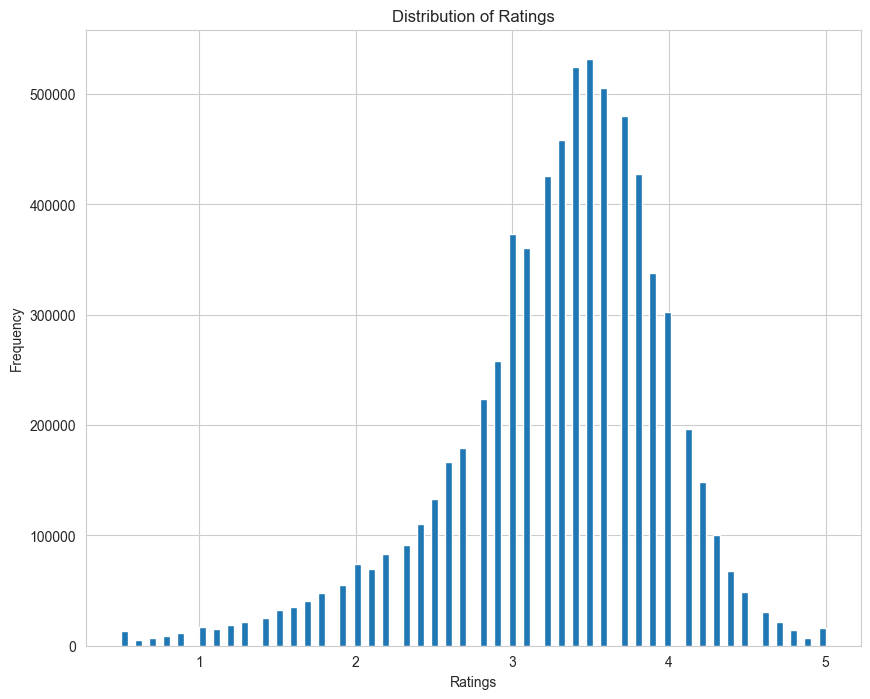

In [7]:
# plot distribution of ratings 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.hist(ratings_rb_df.rating, bins=100)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### Some users analysis 

In [8]:
# group by user_id and count the number of ratings per user
user_ratings_count = ratings_ba_df.groupby('user_id')['user_id'].count()

# sort the values in descending order
user_ratings_count.sort_values(ascending=False, inplace=True)

user_ratings_count

user_id
stonedtrippin.601042    8970
uclabrewn84.439438      8768
sammy.3853              7894
beerchitect.14442       6778
biboergosum.168458      6616
                        ... 
nathanbeerfoo.554979       1
dkdpt2017.864077           1
dkeenan28.712265           1
nathan1979.739351          1
zzyzx.174143               1
Name: user_id, Length: 76244, dtype: int64

In [59]:
users_ratings_count_df = user_ratings_count.reset_index(name='nbr_ratings')

users_ratings_count_df.describe()

,nbr_ratings
count,76244.000000
mean,35.618698
std,199.070268
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,8970.000000


In [9]:
# group by user_id and count the number of ratings per user
user_ratings_count_rb = ratings_rb_df.groupby('user_id')['user_id'].count()

# sort the values in descending order
user_ratings_count_rb.sort_values(ascending=False, inplace=True)

user_ratings_count_rb

user_id
38926     43251
30149     39240
5328      32659
14280     23526
19328     23417
          ...  
207263        1
207274        1
207306        1
207307        1
489914        1
Name: user_id, Length: 70121, dtype: int64

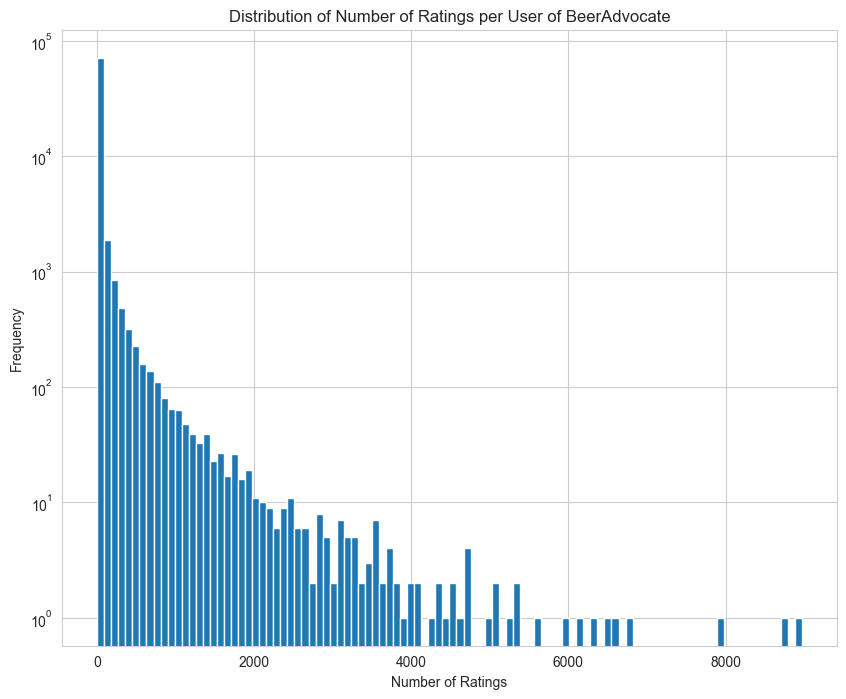

In [10]:
# plot distribution of the number of ratings per user with log scale
plt.figure(figsize=(10,8))
plt.hist(user_ratings_count, bins=100)
plt.yscale('log')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User of BeerAdvocate')
plt.show()

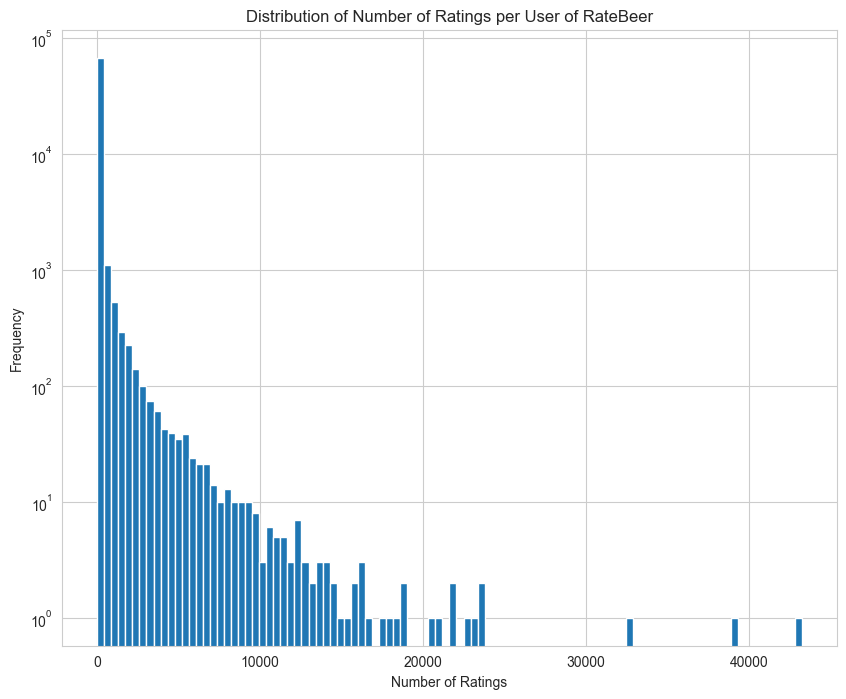

In [11]:
# plot distribution of the number of ratings per user with log scale
plt.figure(figsize=(10,8))
plt.hist(user_ratings_count_rb, bins=100)
plt.yscale('log')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User of RateBeer')
plt.show()

In [12]:
users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')

In [13]:
users_ba_df.columns

Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')

In [14]:
users_ba_df = users_ba_df[['location', 'user_id']]
users_ba_df.columns = ['user_location', 'user_id']

In [15]:
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df, on='user_id', how='left')

In [16]:
# create new column named user_country and extract the country from user_location
ratings_users_ba_df['user_country'] = ratings_users_ba_df['user_location'].str.split(',').str[0]

In [17]:
# group by user_location and count the number of ratings per user_location
user_country_ratings_count = ratings_users_ba_df.groupby('user_country')['user_country'].count()

# sort the values in descending order
user_country_ratings_count.sort_values(ascending=False, inplace=True)

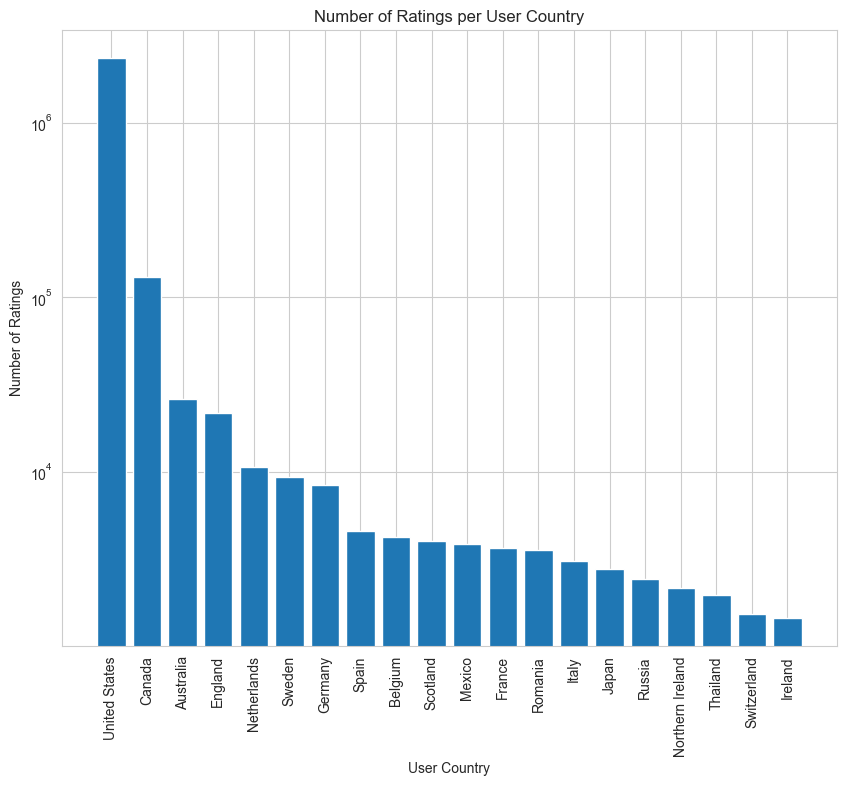

In [18]:
# plot in bar plot the number of ratings per user_country
plt.figure(figsize=(10,8))
plt.bar(user_country_ratings_count[:20].index, user_country_ratings_count[:20].values, log=True)
plt.xticks(rotation=90)
plt.xlabel('User Country')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User Country')
plt.show()

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/3254934083.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_users_ba_df[ratings_users_ba_df['user_country']==country]['rating'], label=country)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na o

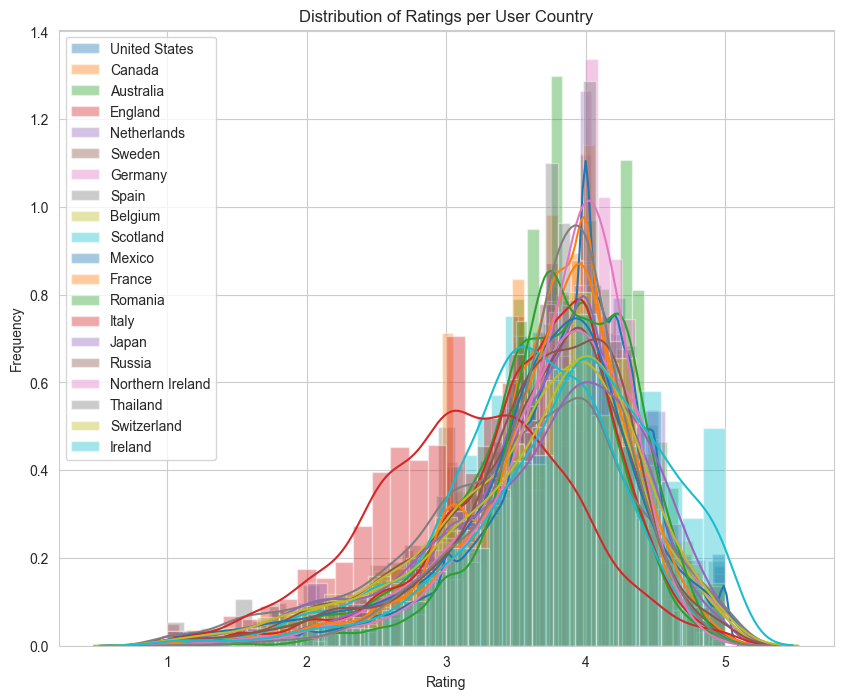

In [19]:
# plot the distribution of ratings per user_country
plt.figure(figsize=(10,8))
for country in user_country_ratings_count[:20].index:
    sns.distplot(ratings_users_ba_df[ratings_users_ba_df['user_country']==country]['rating'], label=country)
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User Country')
plt.show()

## Time series analysis

In [20]:
# transform date column to datetime format
ratings_users_ba_df['date'] = pd.to_datetime(ratings_users_ba_df['date'], unit='s')

In [21]:
# label from 0 to 5 the ratings as follows: if between 4 and 5, then label 5, if between 3 and 4, then label 4, etc.
ratings_users_ba_df['rating_label'] = ratings_users_ba_df['rating'].apply(lambda x: 5 if x >= 4 else (4 if x >= 3 else (3 if x >= 2 else (2 if x >= 1 else (1 if x >= 0 else 0)))))

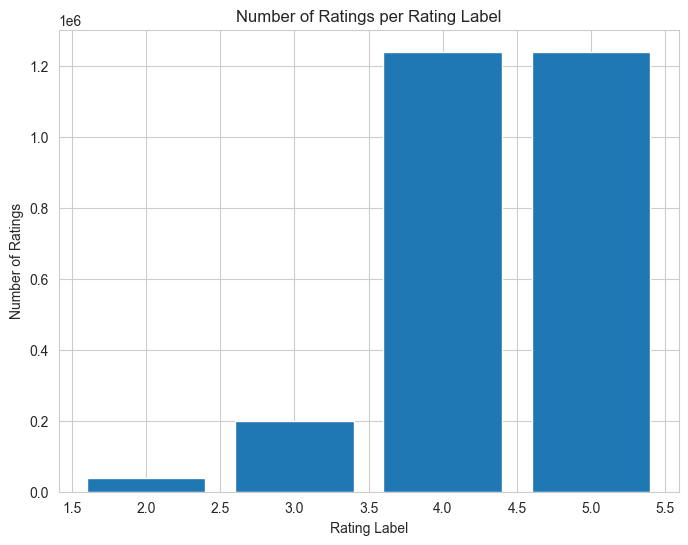

In [22]:
# group by rating_label and count the number of ratings per rating_label
rating_label_count = ratings_users_ba_df.groupby('rating_label')['rating_label'].count()

# plot in bar plot the number of ratings per rating_label
plt.figure(figsize=(8,6))
plt.bar(rating_label_count.index, rating_label_count.values)
plt.xlabel('Rating Label')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Rating Label')
plt.show()

In [23]:
# extract the year and month from date
ratings_users_ba_df['year'] = ratings_users_ba_df['date'].dt.year
ratings_users_ba_df['month'] = ratings_users_ba_df['date'].dt.month

# create new column named year_month
ratings_users_ba_df['year_month'] = ratings_users_ba_df['year'].astype(str) + '-' + ratings_users_ba_df['month'].astype(str)

# transform year_month column to datetime format
ratings_users_ba_df['year_month'] = pd.to_datetime(ratings_users_ba_df['year_month'])

### Yearly analysis

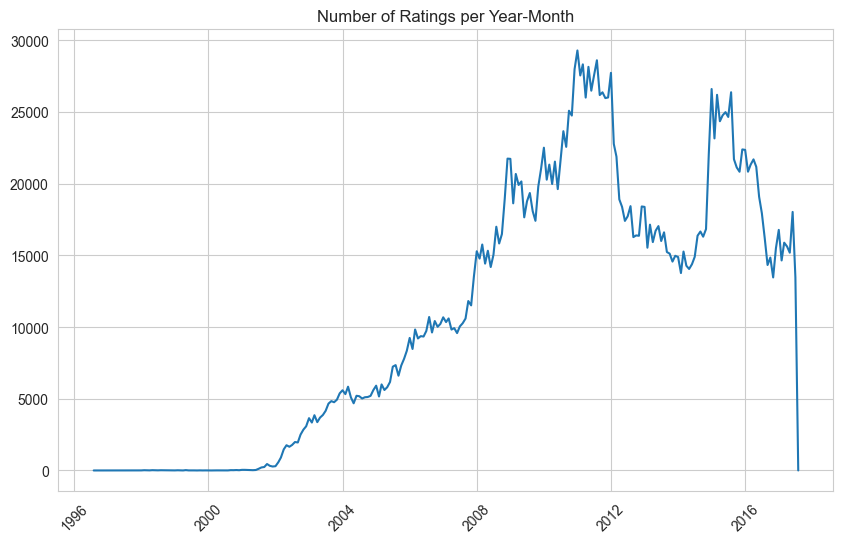

In [24]:
# group by year_month and count the number of ratings per year_month
year_month_ratings_count = ratings_users_ba_df.groupby('year_month')['year_month'].count()

# plot as line chart the number of ratings per year_month
plt.figure(figsize=(10,6))
plt.plot(year_month_ratings_count.index, year_month_ratings_count.values)
plt.title('Number of Ratings per Year-Month')
plt.xticks(rotation=45)
plt.show()

In [25]:
# min and max date
print(ratings_users_ba_df['date'].min())
print(ratings_users_ba_df['date'].max())

1996-08-22 10:00:00
2017-08-01 10:00:00


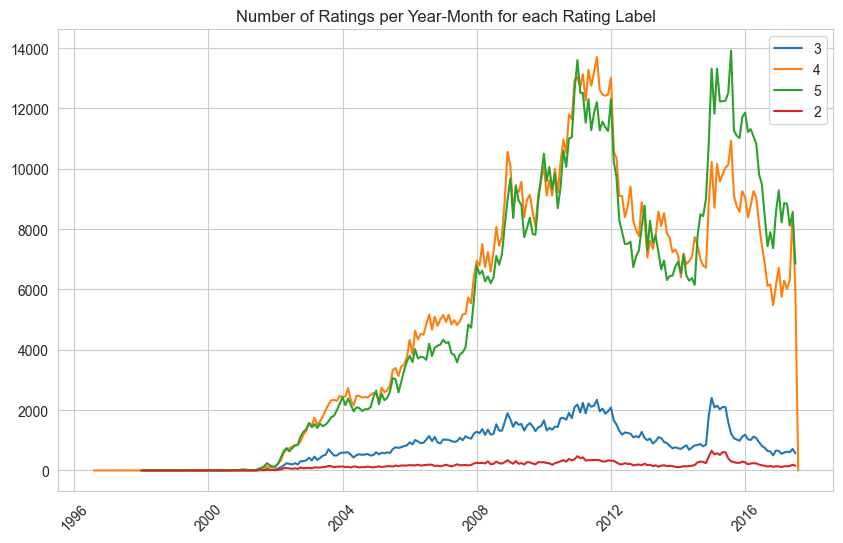

In [26]:
plt.figure(figsize=(10,6))

for label in ratings_users_ba_df['rating_label'].unique():
    plt.plot(ratings_users_ba_df[ratings_users_ba_df['rating_label']==label].groupby('year_month')['year_month'].count().index, ratings_users_ba_df[ratings_users_ba_df['rating_label']==label].groupby('year_month')['year_month'].count().values, label=label)
    
plt.title('Number of Ratings per Year-Month for each Rating Label')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [27]:
# create new dataframe with only the columns needed from year_month_ratings_count
year_month_ratings_count = pd.DataFrame(year_month_ratings_count.index)
year_month_ratings_count.columns = ['year_month']
year_month_ratings_count['nbr_ratings'] = ratings_users_ba_df.groupby('year_month')['year_month'].count().values

# create new column named year
year_month_ratings_count['year'] = year_month_ratings_count['year_month'].dt.year

# create new column named month
year_month_ratings_count['month'] = year_month_ratings_count['year_month'].dt.month

In [28]:
import plotly.express as px
import plotly.graph_objects as go 

year_month_ratings_count_2012 = year_month_ratings_count[(year_month_ratings_count['year'] >= 2012) & (year_month_ratings_count['year'] < 2017)]

# Compute mean number of ratings per month
mean_nbr_ratings_2012 = year_month_ratings_count_2012.groupby('month')['nbr_ratings'].mean()

fig = px.line(x=year_month_ratings_count_2012.month, y=year_month_ratings_count_2012.nbr_ratings, color=year_month_ratings_count_2012.year, title='Number of Ratings per Month (from 2012)')

fig.add_trace(go.Scatter(x=year_month_ratings_count_2012.month, y=mean_nbr_ratings_2012.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Ratings')
fig.show()

In [29]:
# group by rating_label and year-month and count the number of ratings per rating_label and year-month
rating_label_year_month_count = ratings_users_ba_df.groupby(['rating_label', 'year_month'])['rating_label'].count().reset_index(name='nbr_ratings')

# create new column named year
rating_label_year_month_count['year'] = rating_label_year_month_count['year_month'].dt.year

# create new column named month
rating_label_year_month_count['month'] = rating_label_year_month_count['year_month'].dt.month

ratings_label = [2, 3, 4, 5]

for label in ratings_label: 
    label_df = rating_label_year_month_count[rating_label_year_month_count['rating_label']==label]
    
    label_df = label_df[(label_df['year'] >= 2012) & (label_df['year'] < 2017)]

    # Compute mean number of ratings per month
    mean_label_df = label_df.groupby('month')['nbr_ratings'].mean()

    fig = px.line(x=label_df.month, y=label_df.nbr_ratings, color=label_df.year, title='Number of Ratings per Month (from 2012 to 2017 excl.) for Rating Label ' + str(label))

    fig.add_trace(go.Scatter(x=label_df.month, y=mean_label_df.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

    fig.update_xaxes(title_text='Month')
    fig.update_yaxes(title_text='Number of Ratings')
    fig.show()

### Plot the mean rating per month 

We can exclude the year 2017 since it ends at the 7th month 

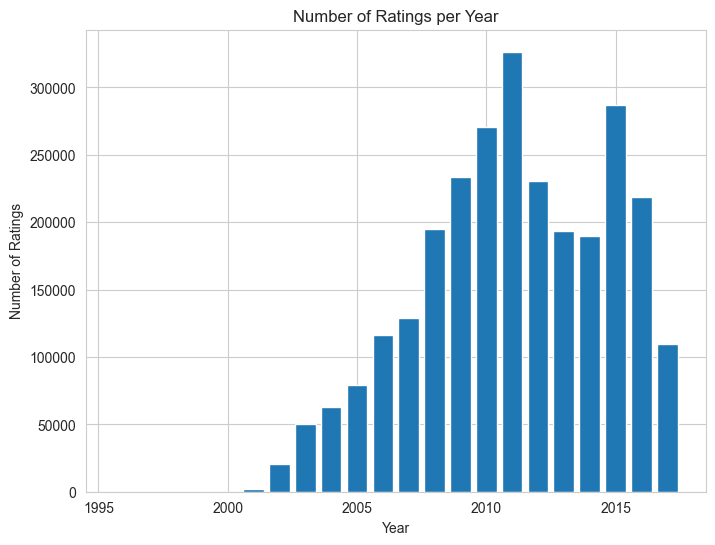

In [37]:
# filter the dataframe to remove rows with year 2017
year_month_ratings_count_filtered = year_month_ratings_count[year_month_ratings_count['year'] != 2017]

# group by year and count the number of ratings per year
year_ratings_count = year_month_ratings_count_filtered.groupby('year')['nbr_ratings'].sum()

# plot in bar plot the number of ratings per year
plt.figure(figsize=(8,6))
plt.bar(year_ratings_count.index, year_ratings_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Year')
plt.show()


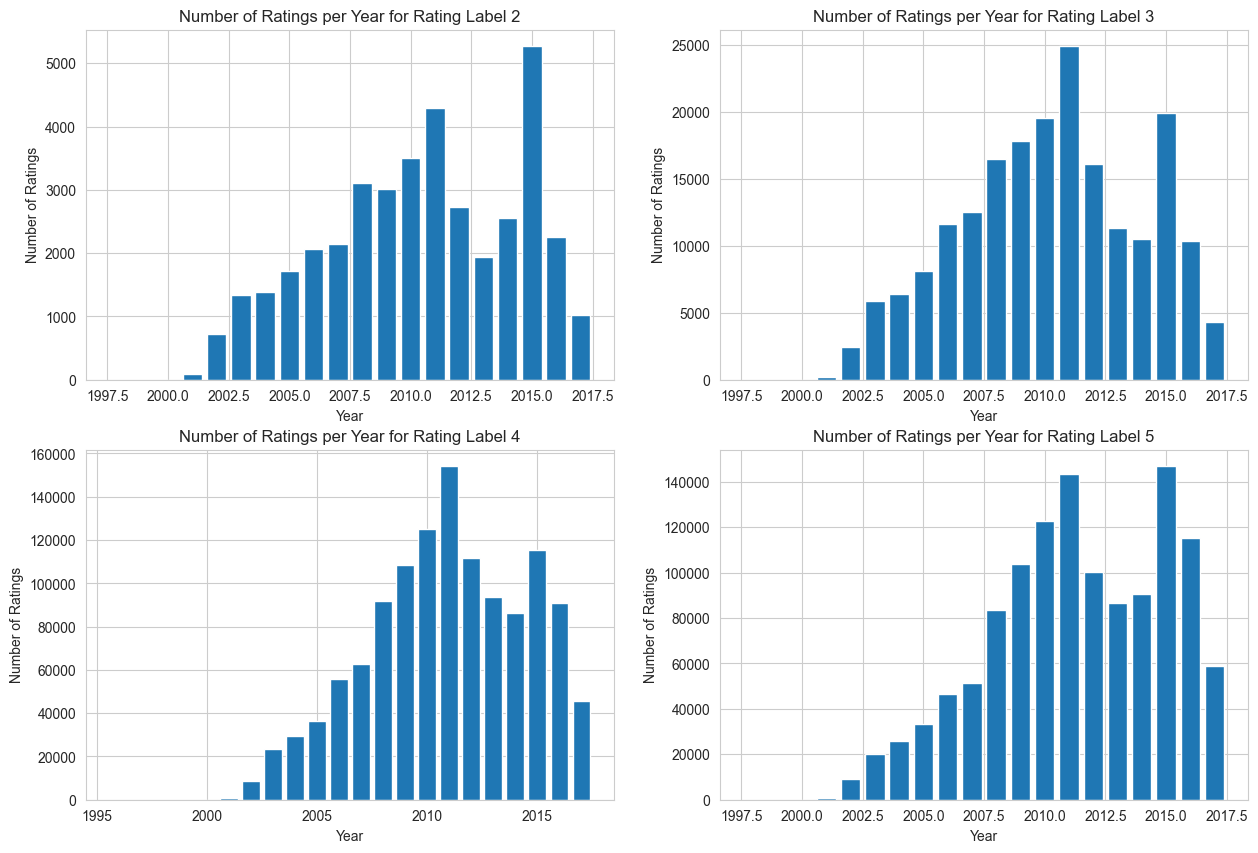

In [40]:
# group by rating_label and year and count the number of ratings per rating_label and year
rating_label_year_count = ratings_users_ba_df.groupby(['rating_label', 'year'])['rating_label'].count().reset_index(name='nbr_ratings')

ratings_label = [2, 3, 4, 5]

# plot in bar plot the number of ratings per rating_label and year in subplots
fig, axes = plt.subplots(2, 2, figsize=(15,10))

for i, label in enumerate(ratings_label):
    label_df = rating_label_year_count[rating_label_year_count['rating_label']==label]
    axes[i//2, i%2].bar(label_df.year, label_df.nbr_ratings)
    axes[i//2, i%2].set_title('Number of Ratings per Year for Rating Label ' + str(label))
    axes[i//2, i%2].set_xlabel('Year')
    axes[i//2, i%2].set_ylabel('Number of Ratings')

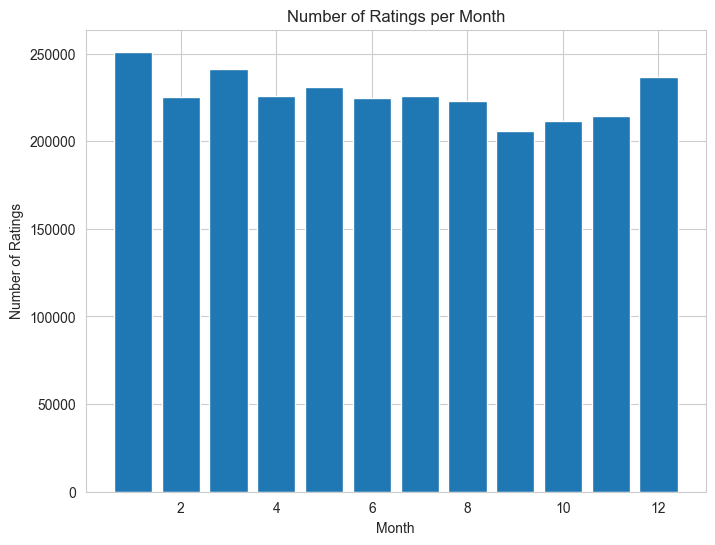

In [38]:
# group by month and count the number of ratings per month 
month_ratings_count = year_month_ratings_count_filtered.groupby('month')['nbr_ratings'].sum()

# plot in bar plot the number of ratings per month
plt.figure(figsize=(8,6))

plt.bar(month_ratings_count.index, month_ratings_count.values)
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Month')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



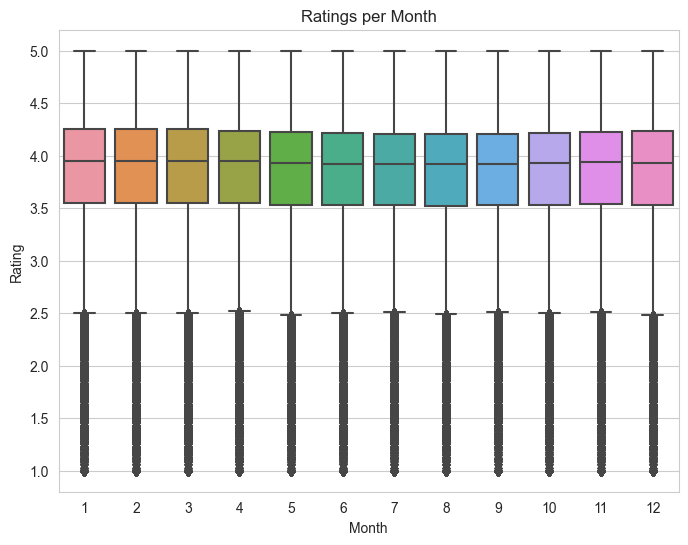

In [45]:
# plot boxplot of ratings per month
plt.figure(figsize=(8,6))
sns.boxplot(x='month', y='rating', data=ratings_users_ba_df)
plt.xlabel('Month')
plt.ylabel('Rating')
plt.title('Ratings per Month')
plt.show()


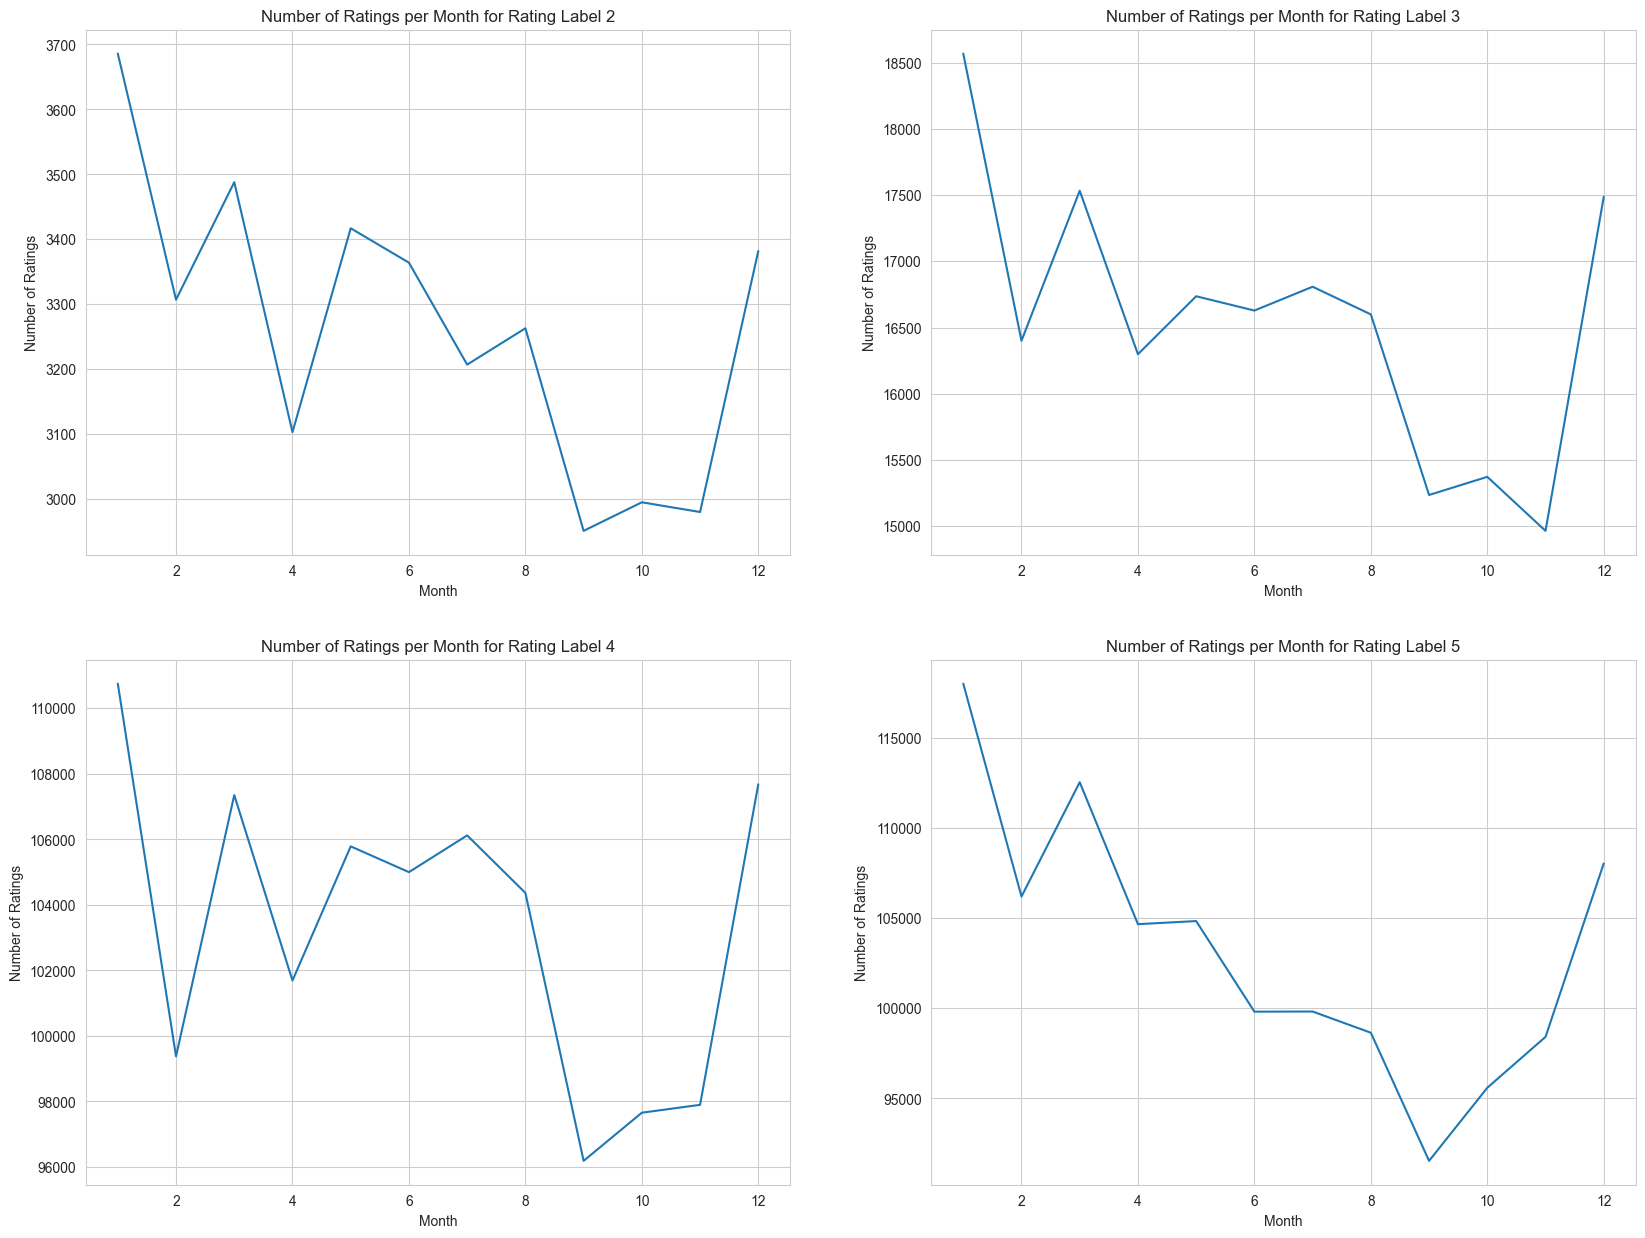

In [39]:
# group by rating_label and month and count the number of ratings per rating_label and month
rating_label_month_count = ratings_users_ba_df.groupby(['rating_label', 'month'])['rating_label'].count().reset_index(name='nbr_ratings')

# plot in bar plot the number of ratings per rating_label and month in different subplots
plt.figure(figsize=(20,15))

for label in ratings_label:
    plt.subplot(2,2,label-1)
    plt.plot(rating_label_month_count[rating_label_month_count['rating_label']==label]['month'], rating_label_month_count[rating_label_month_count['rating_label']==label]['nbr_ratings'])
    plt.xlabel('Month')
    plt.ylabel('Number of Ratings')
    plt.title('Number of Ratings per Month for Rating Label ' + str(label))

In [43]:
# create four dataframes for each rating_label with the percentage change of the number of ratings per month
ratings_label = [2, 3, 4, 5]

for label in ratings_label:
    label_df = rating_label_month_count[rating_label_month_count['rating_label']==label]
    label_df['pct_change'] = label_df['nbr_ratings'].pct_change()
    label_df['pct_change'] = label_df['pct_change'].fillna(0)
    if label == 2:
        ratings_label_2_df = label_df
    elif label == 3:
        ratings_label_3_df = label_df
    elif label == 4:
        ratings_label_4_df = label_df
    else: 
        ratings_label_5_df = label_df

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/3914665671.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/3914665671.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/3914665671.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

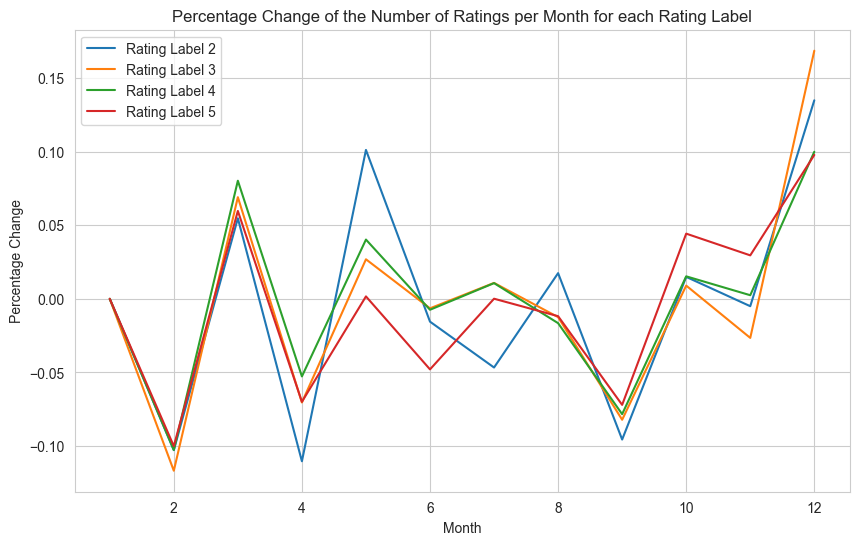

In [44]:
# plot in line plot the percentage change of the number of ratings per month for each rating_label in same plot
plt.figure(figsize=(10,6))
plt.plot(ratings_label_2_df['month'], ratings_label_2_df['pct_change'], label='Rating Label 2')
plt.plot(ratings_label_3_df['month'], ratings_label_3_df['pct_change'], label='Rating Label 3')
plt.plot(ratings_label_4_df['month'], ratings_label_4_df['pct_change'], label='Rating Label 4')
plt.plot(ratings_label_5_df['month'], ratings_label_5_df['pct_change'], label='Rating Label 5')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.title('Percentage Change of the Number of Ratings per Month for each Rating Label')
plt.legend()
plt.show()


The analysis might be biased considering the different type of raters: 
* We should decide on taking a sample of raters 
* Depending on their behavior: experts or novices? 

Hypothesis: Take users which have rated 100 times and below -> which might be considered as the novices 

We might think that novices will more likely rate beers based on the moment they are tasting it. So, it might more represent the correlation with the events.

In [60]:
# create arrays of user_id which have a number of ratings less than 100 
user_id_less_100 = users_ratings_count_df[users_ratings_count_df.nbr_ratings < 100].user_id.values

In [62]:
len(user_id_less_100)

71703

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/2741136035.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/2741136035.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_1167/2741136035.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

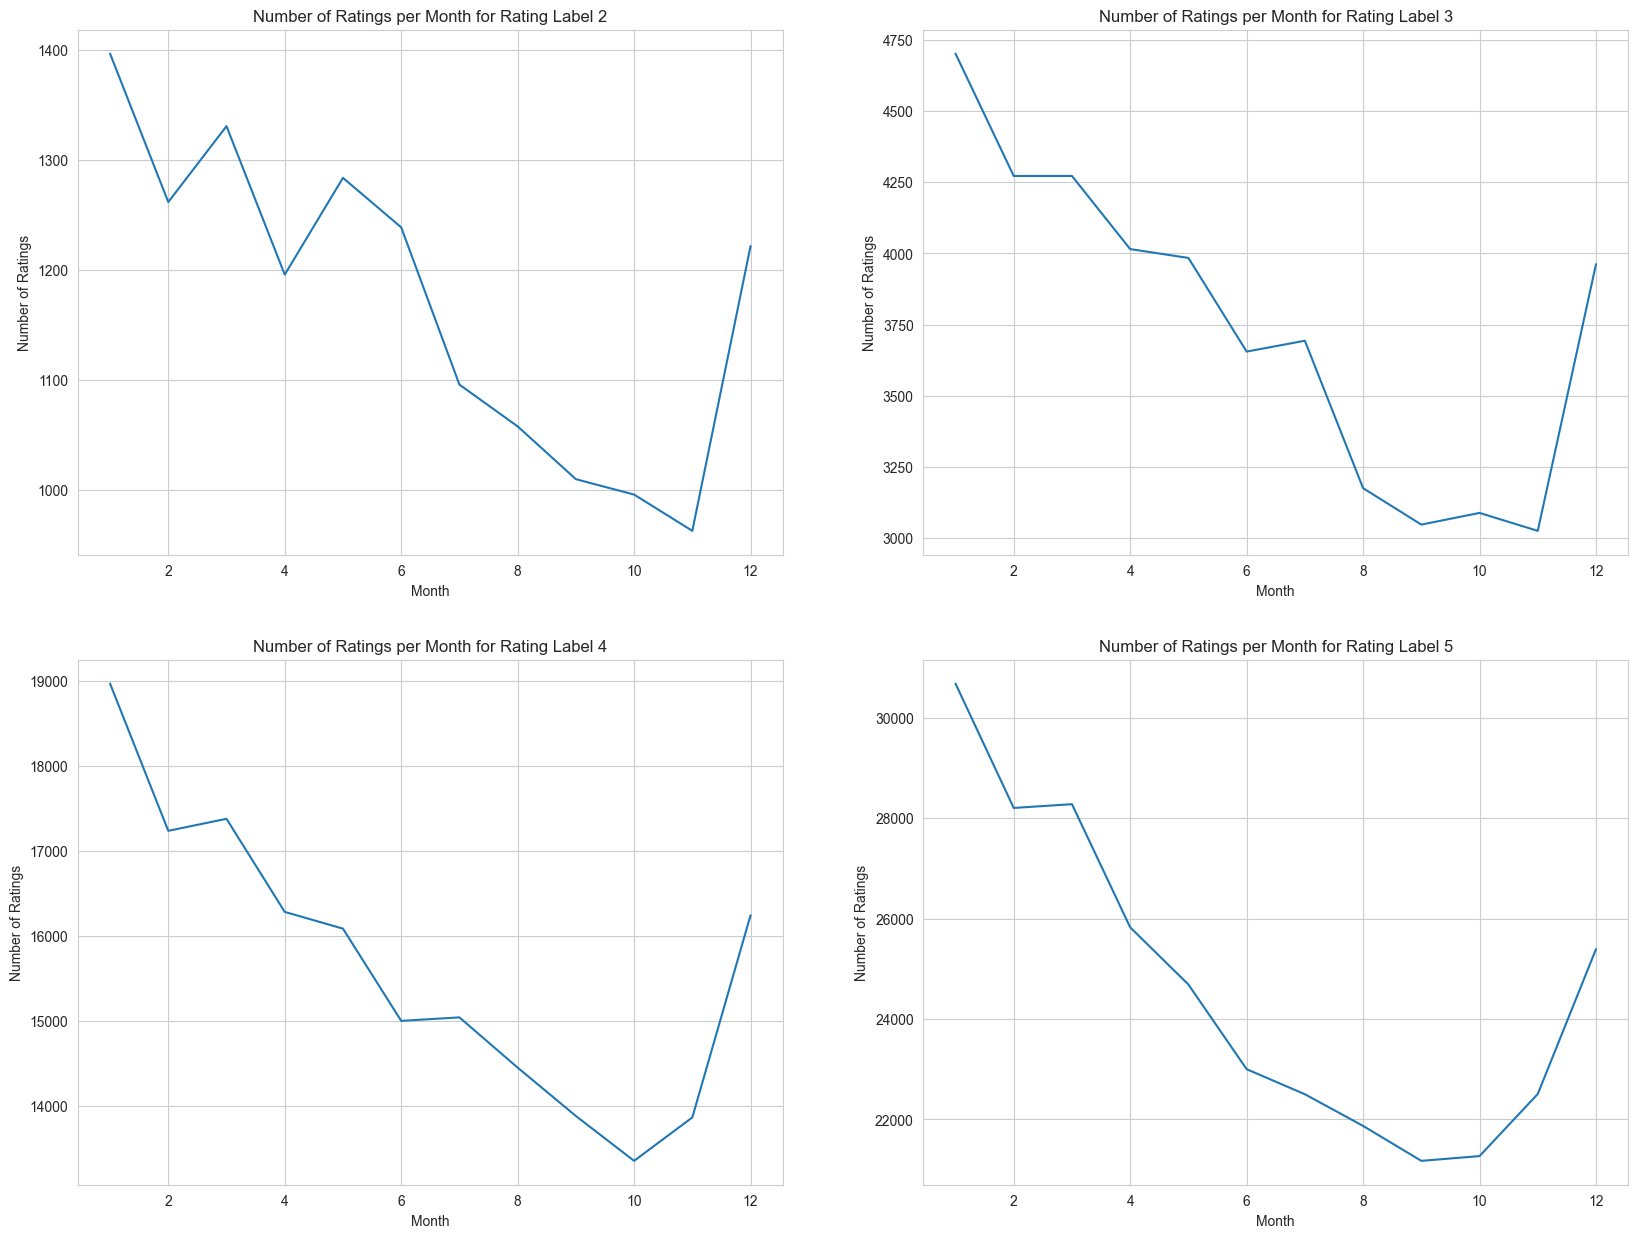

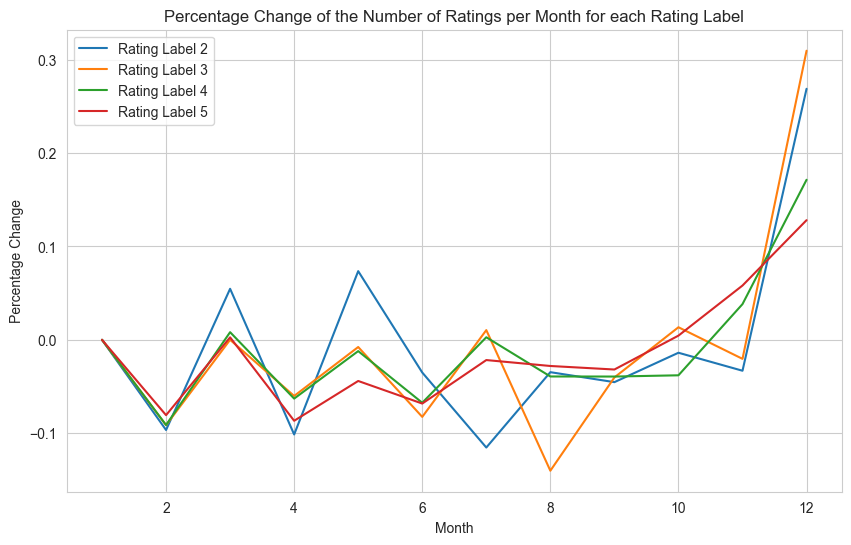

In [63]:
# filter the dataframe to keep only rows with user_id in user_id_less_100
ratings_users_ba_df_less_100 = ratings_users_ba_df[ratings_users_ba_df['user_id'].isin(user_id_less_100)]

# group by rating_label and month and count the number of ratings per rating_label and month
rating_label_month_count_less_100 = ratings_users_ba_df_less_100.groupby(['rating_label', 'month'])['rating_label'].count().reset_index(name='nbr_ratings')

# plot in bar plot the number of ratings per rating_label and month in different subplots
plt.figure(figsize=(20,15))

for label in ratings_label:
    plt.subplot(2,2,label-1)
    plt.plot(rating_label_month_count_less_100[rating_label_month_count_less_100['rating_label']==label]['month'], rating_label_month_count_less_100[rating_label_month_count_less_100['rating_label']==label]['nbr_ratings'])
    plt.xlabel('Month')
    plt.ylabel('Number of Ratings')
    plt.title('Number of Ratings per Month for Rating Label ' + str(label)) 
    
# create four dataframes for each rating_label with the percentage change of the number of ratings per month
ratings_label = [2, 3, 4, 5]

for label in ratings_label:
    label_df_less_100 = rating_label_month_count_less_100[rating_label_month_count_less_100['rating_label']==label]
    label_df_less_100['pct_change'] = label_df_less_100['nbr_ratings'].pct_change()
    label_df_less_100['pct_change'] = label_df_less_100['pct_change'].fillna(0)
    
    if label == 2:
        ratings_label_2_df_less_100 = label_df_less_100
    elif label == 3:
        ratings_label_3_df_less_100 = label_df_less_100
    elif label == 4:
        ratings_label_4_df_less_100 = label_df_less_100
    else:
        ratings_label_5_df_less_100 = label_df_less_100
        
# plot in line plot the percentage change of the number of ratings per month for each rating_label in same plot
plt.figure(figsize=(10,6))
plt.plot(ratings_label_2_df_less_100['month'], ratings_label_2_df_less_100['pct_change'], label='Rating Label 2')
plt.plot(ratings_label_3_df_less_100['month'], ratings_label_3_df_less_100['pct_change'], label='Rating Label 3')
plt.plot(ratings_label_4_df_less_100['month'], ratings_label_4_df_less_100['pct_change'], label='Rating Label 4')
plt.plot(ratings_label_5_df_less_100['month'], ratings_label_5_df_less_100['pct_change'], label='Rating Label 5')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.title('Percentage Change of the Number of Ratings per Month for each Rating Label')
plt.legend()
plt.show()

